# MLS Position Analysis using Machine Learning

In this, I will import soccer data from https://www.americansocceranalysis.com/. I will use a machine learning algorithm, K Nearest Neighbor, to predict a player's position based on a handful of input variables.

Loading packages that I will use

In [8]:
library(tidyverse)
library(readxl)

I import the data from Microsoft Excel. I do some manipulating to clean the data a bit.

In [9]:
xgoals = read_excel("~/Desktop/american_soccer_analysis_mls_xgoals_players_2020-09-04.xlsx")
colnames(xgoals) = xgoals[2,]
xgoals = xgoals[-c(1,2),]

xpass = read_excel("~/Desktop/american_soccer_analysis_mls_xpass_players_2020-09-04.xlsx")
colnames(xpass) = xpass[2,]
xpass = xpass[-c(1,2),]

salaries = read_excel("~/Desktop/american_soccer_analysis_mls_salaries_players_2020-09-04.xlsx")
colnames(salaries) = salaries[2,]
salaries = salaries[-c(1,2),]

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* … and 11 more problems
New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* … and 6 more problems
New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* … and 1 more problem


In [13]:
head(xgoals)

Player,Team,Season,Minutes,Shots,SoT,G,xG,xPlace,G-xG,KeyP,A,xA,A-xA,xG+xA,PA,xPA
Alejandro Pozuelo,TOR,2020,842,22,8,2,3.1081,-0.0426,-1.1081,35,5,5.7406,-0.7406,8.8487,1.6752,2.0247
Diego Rossi,LAFC,2020,785,31,19,9,5.0942,3.2335,3.9058,11,1,1.7839,-0.7839,6.8782,3.8074,2.4521
Cristian Pavón,LAG,2020,789,27,14,5,4.3843,1.1225,0.6157,13,0,1.5182,-1.5182,5.9025,3.6652,3.2471
Gustavo Bou,NER,2020,813,40,16,3,2.8979,0.0991,0.1021,23,0,2.7289,-2.7289,5.6268,2.317,2.4146
Raúl Ruidíaz,SEA,2020,739,27,10,5,4.8687,-0.6836,0.1313,6,1,0.553,0.447,5.4217,2.963,4.0326
Adam Buksa,NER,2020,758,24,10,2,3.8472,-0.1939,-1.8472,10,0,1.1562,-1.1562,5.0034,1.5582,2.9265


[1] "Player"  "Team"    "Season"  "Minutes" "Shots"   "SoT"     "G"      
 [8] "xG"      "xPlace"  "G-xG"    "KeyP"    "A"       "xA"      "A-xA"   
[15] "xG+xA"   "PA"      "xPA"

In [11]:
head(xpass)

Player,Team,Season,Minutes,Passes,Pass %,xPass %,Score,Per100,Distance,Vertical,Touch %
Alejandro Pozuelo,TOR,2020,842,584,0.8253,0.7756,29.0677,4.9773,17.3095,3.0467,0.117
Steven Birnbaum,DCU,2020,710,397,0.8615,0.8046,22.568,5.6846,21.4419,9.9534,0.1005
Aníbal Godoy,NSH,2020,627,371,0.9353,0.8748,22.4525,6.0519,20.3096,4.5876,0.1266
Jonathan Mensah,CLB,2020,893,589,0.8947,0.8573,22.0297,3.7402,24.7155,9.3884,0.1228
Michael Bradley,TOR,2020,696,581,0.926,0.8902,20.793,3.5788,19.4394,4.8781,0.1136
Jonathan Osorio,TOR,2020,578,388,0.9072,0.8552,20.1677,5.1979,15.0759,1.7695,0.1022


In [12]:
head(salaries)

Player,Team,Season,Position,Base Salary,Guaranteed Compensation,Date
Zlatan Ibrahimovic,LAG,2019,F,7200000,7200000,2019-09-13
Michael Bradley,TOR,2019,M,6000000,6500000,2019-09-13
Jozy Altidore,TOR,2019,F,4891250.04,6332250.04,2019-09-13
Carlos Vela,LAFC,2019,M,4500000,6300000,2019-09-13
Bastian Schweinsteiger,CHI,2019,M,5600000.04,5600000.04,2019-09-13
Ignacio Piatti,MTL,2019,M,530000.04,4443333.37,2019-09-13


Below, I will merge the 3 data frames into 1

In [14]:
data = merge(xgoals, xpass, by = "Player")
data = merge(data, salaries, by = "Player")

I will create a training and a test data set to use for the KNN model.

In [15]:
set.seed(123)

train_index = sample(nrow(data) , floor(nrow(data) * .5))

train = data[train_index,]
test = data[-train_index,]

Below, I will perform the KNN model based on different K parameters and I will track the accuracy.

In [62]:
library(class)

knn.accuracy = 1

for(i in 1:10)
{
  knn.pred = knn(train = train[,c(5,6,8,13,17,21,23,26,27,28)] , test = test[,c(5,6,8,13,17,21,23,26,27,28)] , cl = train$Position, k = i)
  knn.accuracy[i] = sum(knn.pred == test$Position) / nrow(test)
}

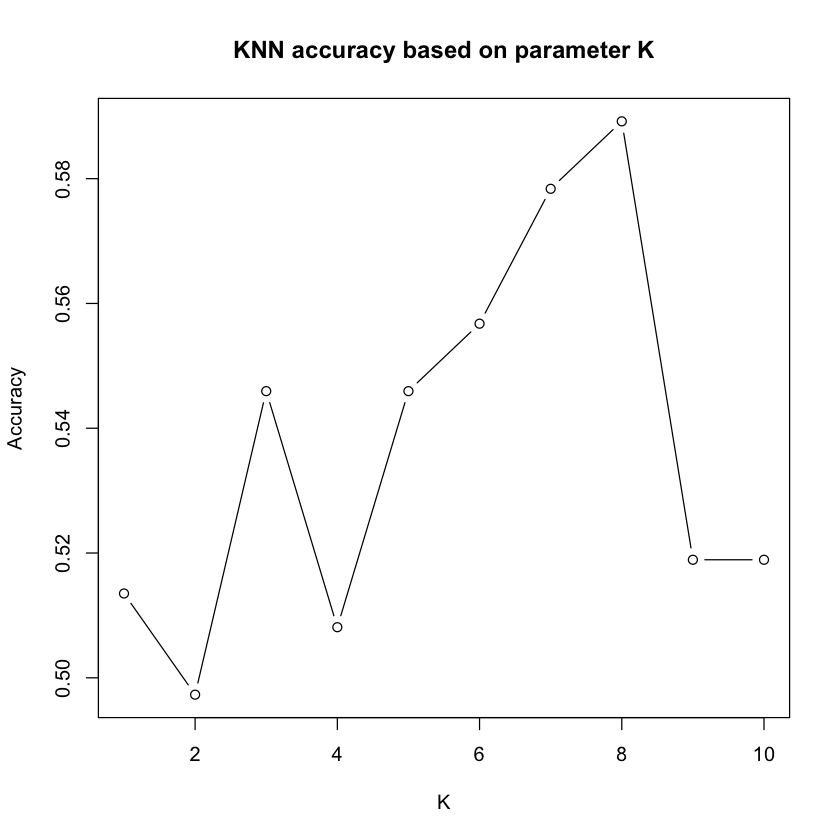

In [63]:
plot(knn.accuracy, main = "KNN accuracy based on parameter K", xlab = "K", ylab = "Accuracy", type = "b")


As we can see, K = 8 has the highest accuracy. I will re run the model with K = 8, so we can take a closer look at how our model is performing.

In [80]:
knn_5 = knn(train = train[,c(5,6,8,13,17,21,23,26,27,28)] , test = test[,c(5,6,8,13,17,21,23,26,27,28)] , cl = train$Position, k = 8)

In [81]:
table(knn_5 == test$Position)


FALSE  TRUE 
   77   108 

Below is a Confusion Matrix.

In [84]:
table(knn_5, test$Position)

     
knn_5  D  F GK  M
   D  43  0  1 15
   F   5 18  0 11
   GK  0  0  0  0
   M  27 17  1 47

In [86]:
defender_accuracy = 43 / (43 + 5 + 27)
defender_accuracy

[1] 0.5733333

In [87]:
midfielder_accuracy = 47 / (15 + 11 + 47)
midfielder_accuracy

[1] 0.6438356

In [88]:
forward_accuracy = 18 / (0 + 18 + 0 + 17)
forward_accuracy

[1] 0.5142857

In [89]:
gk_accuracy = 0
gk_accuracy

[1] 0